RED WINE PROJECT

In [55]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [56]:
data=pd.read_csv(r"C:\Users\Hiremath\OneDrive\Desktop\Papa folder\Files-main\Files-main\wine.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [57]:
data.shape

(1599, 13)

In [58]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [59]:
from sklearn.preprocessing import OrdinalEncoder

In [60]:
ord_encoder = OrdinalEncoder (categories=[['Low','Medium','High']])
df1= ord_encoder.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

In [61]:
data['Alcohol_content']=df1
data.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5


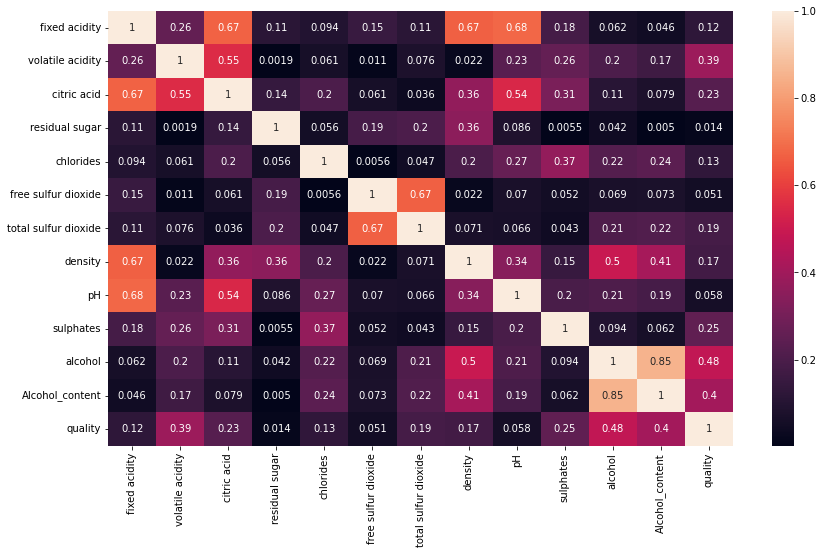

In [62]:
df_corr= data.corr().abs()
plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})
plt.show()

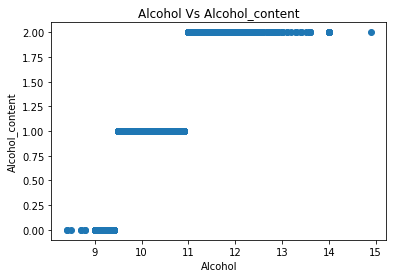

In [63]:
plt.scatter(data.alcohol,data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol_content')
plt.title('Alcohol Vs Alcohol_content')
plt.show()

In [64]:
X=data.drop(columns=['quality','Alcohol_content'])
y=data ['quality']

In [65]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=40)

In [83]:
def metric_score(clf,x_train,x_test,y_train,y_test,train= True):
    if train:
        y_pred=clf.predict(x_train)
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    
    elif train==False:
        pred =clf.predict(x_test)
        
        print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
        
        print('\n \n Test Classification report \n', classification_report(y_test, pred,digits=2))
        
        
        
    

In [84]:
clf= DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [87]:
metric_score(clf,x_train,x_test,y_train,y_test,train= True)   # for training score

metric_score(clf,x_train,x_test,y_train,y_test,train= False)   # for testing score

Accuracy Score: 100.00%
Accuracy Score: 65.25%

 
 Test Classification report 
               precision    recall  f1-score   support

           3       0.25      0.25      0.25         4
           4       0.00      0.00      0.00        11
           5       0.71      0.73      0.72       160
           6       0.66      0.67      0.67       164
           7       0.58      0.61      0.59        54
           8       0.00      0.00      0.00         7

    accuracy                           0.65       400
   macro avg       0.37      0.38      0.37       400
weighted avg       0.64      0.65      0.64       400

